<a href="https://colab.research.google.com/github/yunjinchoidev/ai/blob/main/%5BKAGGLE%5D_Plant_Pathology_2020_FGVC7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
os.environ['KAGGLE_USERNAME'] = 'yunjinchoidev'
os.environ['KAGGLE_KEY'] = '3d90c15ed3e0411bd30537de9f540179'

In [4]:
!kaggle competitions download -c plant-pathology-2020-fgvc7
!unzip '*.zip'

 99% 771M/779M [00:05<00:00, 178MB/s]
100% 779M/779M [00:06<00:00, 136MB/s]
Archive:  plant-pathology-2020-fgvc7.zip
  inflating: images/Test_0.jpg       
  inflating: images/Test_1.jpg       
  inflating: images/Test_10.jpg      
  inflating: images/Test_100.jpg     
  inflating: images/Test_1000.jpg    
  inflating: images/Test_1001.jpg    
  inflating: images/Test_1002.jpg    
  inflating: images/Test_1003.jpg    
  inflating: images/Test_1004.jpg    
  inflating: images/Test_1005.jpg    
  inflating: images/Test_1006.jpg    
  inflating: images/Test_1007.jpg    
  inflating: images/Test_1008.jpg    
  inflating: images/Test_1009.jpg    
  inflating: images/Test_101.jpg     
  inflating: images/Test_1010.jpg    
  inflating: images/Test_1011.jpg    
  inflating: images/Test_1012.jpg    
  inflating: images/Test_1013.jpg    
  inflating: images/Test_1014.jpg    
  inflating: images/Test_1015.jpg    
  inflating: images/Test_1016.jpg    
  inflating: images/Test_1017.jpg    
  inflati

In [9]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [6]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [7]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [10]:
submission.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.25,0.25,0.25,0.25
1,Test_1,0.25,0.25,0.25,0.25
2,Test_2,0.25,0.25,0.25,0.25
3,Test_3,0.25,0.25,0.25,0.25
4,Test_4,0.25,0.25,0.25,0.25


In [17]:
healthy = train.loc[train['healthy']==1]
multiple_diseases = train.loc[train['multiple_diseases']==1]
rust = train.loc[train['rust']==1]
scab = train.loc[train['scab']==1]

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
mpl.rc('font', size=15)
plt.figure(figsize=(7,7))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [22]:
label = ['healthy', 'multiple diseases', 'rust', 'scab']

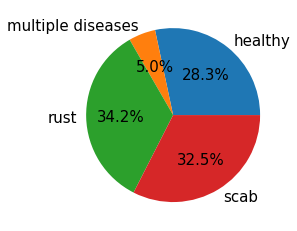

In [24]:
plt.pie([len(healthy), len(multiple_diseases), len(rust), len(scab)], labels=label, autopct='%.1f%%');

In [25]:
import matplotlib.gridspec as gridspec
import cv2

In [26]:
def show_image(img_ids, rows=2, cols=3):
  assert len(img_ids) <= rows*cols

  plt.figure(figsize=(15, 8))
  grid = gridspec.GridSpec(rows, cols)

  for idx, img_id in enumerate(img_ids):
    img_path = f'images/{img_id}.jpg'
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정 
    ax = plt.subplot(grid[idx])
    ax.imshow(image) # 이미지 출력 

    


In [27]:
# 각 타깃값별 image_id(마지막 6개)
num_of_imgs = 6
last_healthy_img_ids = healthy['image_id'][-num_of_imgs:]
last_multiple_diseases_img_ids = multiple_diseases['image_id'][-num_of_imgs:]
last_rust_img_ids = rust['image_id'][-num_of_imgs:]
last_scab_img_ids = scab['image_id'][-num_of_imgs:]

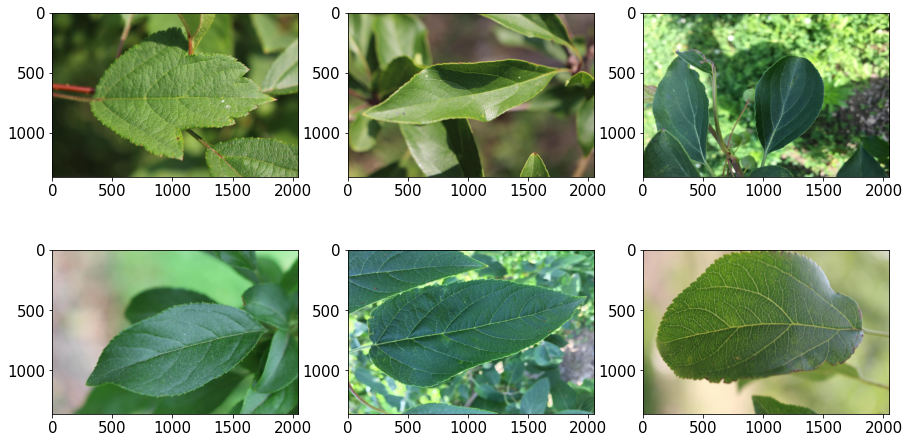

In [28]:
show_image(last_healthy_img_ids) # 건강한 잎사귀 출력


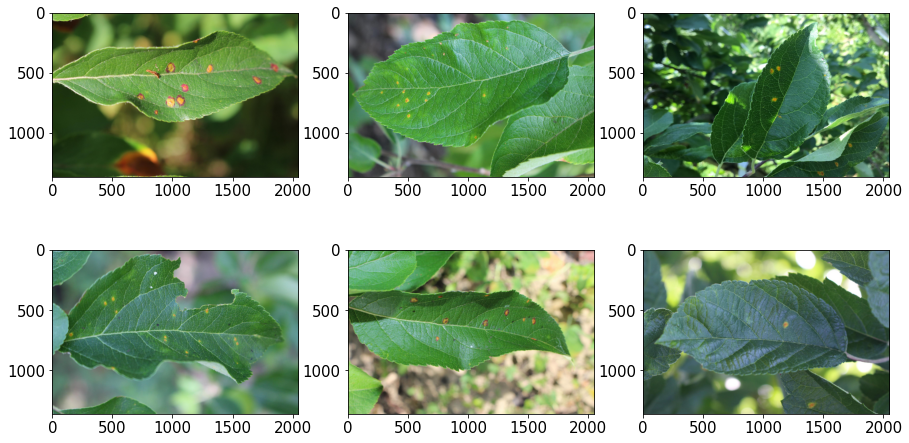

In [29]:
show_image(last_rust_img_ids) # 녹병에 걸린 잎사귀 출력


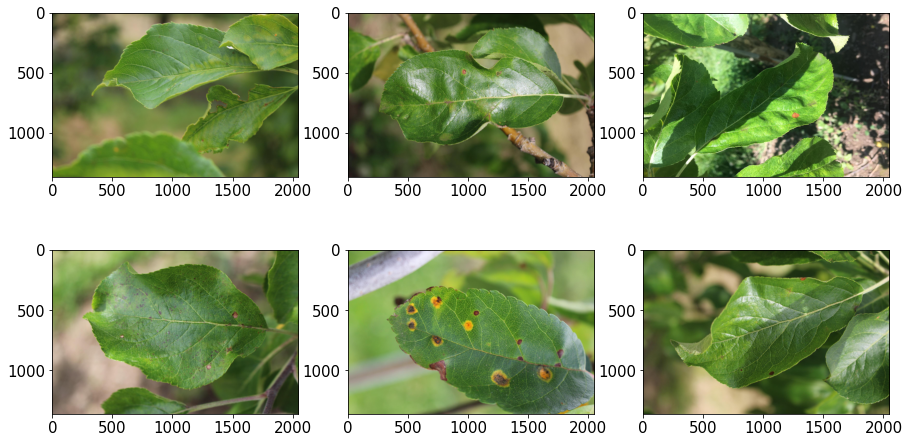

In [30]:
show_image(last_multiple_diseases_img_ids) # 여러 질병에 걸린 잎사귀 출력


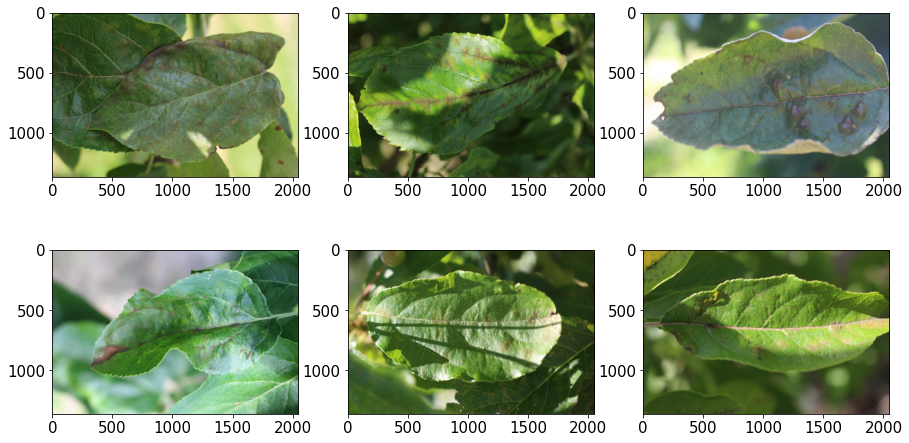

In [31]:
show_image(last_scab_img_ids) # 붉은곰팡이병에 걸린 잎사귀